In [10]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import h5py
from keras.models import load_model
import tensorflow as tf
import pandas as pd
import random
from sklearn.metrics import r2_score

En una primera instancia observaremos la representatividad de cada set

In [2]:
#Cargamos los datos
with h5py.File('/home/anell/Desktop/Bovy/AnellExercises/Data_Separated/D_test.h5') as F:  
    X_test = np.array(F['X_test'])
    Y_test = np.array(F['Y_test'])
    K_mag_test = np.array(F['K_mag_test'])
    X_offset_test = np.array(F['X_offset_test'])
    snr_test = np.array(F['snr_test'])
    FeH_test = np.array(F['FeH_test'])
    teff_test = np.array(F['teff_test'])
    
with h5py.File('/home/anell/Desktop/Bovy/AnellExercises/Data_Separated/D_train_valid_1.h5') as F:  
    X_train1 = np.array(F['X_train'])
    Y_train1 = np.array(F['Y_train'])
    K_mag_train1 = np.array(F['K_mag_train'])
    X_offset_train1 = np.array(F['X_offset_train'])
    snr_train1 = np.array(F['snr_train'])
    FeH_train1 = np.array(F['FeH_train'])
    teff_train1 = np.array(F['teff_train'])
    X_val1 = np.array(F['X_val'])
    Y_val1 = np.array(F['Y_val'])
    K_mag_val1 = np.array(F['K_mag_val'])
    X_offset_val1 = np.array(F['X_offset_val'])
    snr_val1 = np.array(F['snr_val'])
    FeH_val1 = np.array(F['FeH_val'])
    teff_val1 = np.array(F['teff_val'])

with h5py.File('/home/anell/Desktop/Bovy/AnellExercises/Data_Separated/D_train_valid_2.h5') as F:  
    X_train2 = np.array(F['X_train'])
    Y_train2 = np.array(F['Y_train'])
    K_mag_train2 = np.array(F['K_mag_train'])
    X_offset_train2 = np.array(F['X_offset_train'])
    snr_train2 = np.array(F['snr_train'])
    FeH_train2 = np.array(F['FeH_train'])
    teff_train2 = np.array(F['teff_train'])
    X_val2 = np.array(F['X_val'])
    Y_val2 = np.array(F['Y_val'])
    K_mag_val2 = np.array(F['K_mag_val'])
    X_offset_val2 = np.array(F['X_offset_val'])
    snr_val2 = np.array(F['snr_val'])
    FeH_val2 = np.array(F['FeH_val'])
    teff_val2 = np.array(F['teff_val'])
    
with h5py.File('/home/anell/Desktop/Bovy/AnellExercises/Data_Separated/D_train_valid_3.h5') as F:  
    X_train3 = np.array(F['X_train'])
    Y_train3 = np.array(F['Y_train'])
    K_mag_train3 = np.array(F['K_mag_train'])
    X_offset_train3 = np.array(F['X_offset_train'])
    snr_train3 = np.array(F['snr_train'])
    FeH_train3 = np.array(F['FeH_train'])
    teff_train3 = np.array(F['teff_train'])
    X_val3 = np.array(F['X_val'])
    Y_val3 = np.array(F['Y_val'])
    K_mag_val3 = np.array(F['K_mag_val'])
    X_offset_val3 = np.array(F['X_offset_val'])
    snr_val3 = np.array(F['snr_val'])
    FeH_val3 = np.array(F['FeH_val'])
    teff_val3 = np.array(F['teff_val'])

/home/anell/anaconda3/envs/python37-astronn/lib/python3.7/site-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
/home/anell/anaconda3/envs/python37-astronn/lib/python3.7/site-packages/ipykernel_launcher.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  # This is added back by InteractiveShellApp.init_path()
/home/anell/anaconda3/envs/python37-astron

In [27]:
def FeH_cut(FeH_list):
    idx_good = []
    for i in range(len(FeH_list)):
        if FeH_list[i] != -9999.:
            idx_good.append(i)
    return idx_good

idx_train1 = FeH_cut(FeH_train1)
idx_val1 = FeH_cut(FeH_val1)
idx_train2 = FeH_cut(FeH_train2)
idx_val2 = FeH_cut(FeH_val2)
idx_train3 = FeH_cut(FeH_train3)
idx_val3 = FeH_cut(FeH_val3)
idx_test = FeH_cut(FeH_test)

In [30]:
len(idx_train1), len(Y_train1)

(6757, 7000)

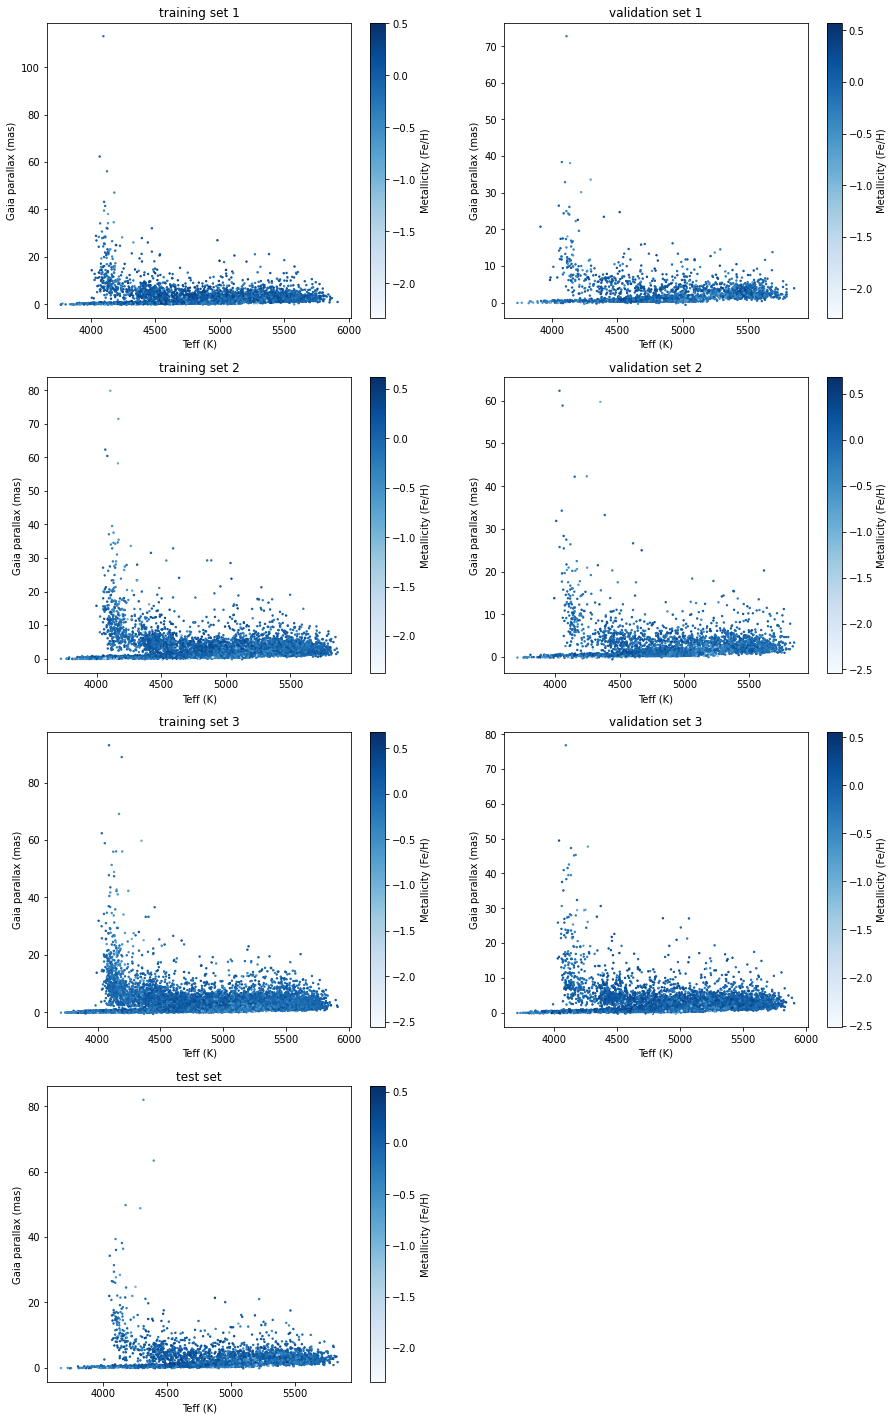

In [57]:
#Train-Val-1

plt.figure(figsize = (15,25))
plt.subplot(421)
plt.scatter(teff_train1[idx_train1],Y_train1[idx_train1], c=FeH_train1[idx_train1], s=2,cmap="Blues")
#plt.scatter(teff_val1[idx_val1],Y_val1[idx_val1], color = "blue",s=2)# c=FeH_val1[idx_val1], s=2,cmap="hot")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("training set 1")

plt.subplot(422)
plt.scatter(teff_val1[idx_val1],Y_val1[idx_val1], c=FeH_val1[idx_val1], s=2,cmap="Blues")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("validation set 1")

#Train-Val-2

plt.subplot(423)
plt.scatter(teff_train2[idx_train2],Y_train2[idx_train2], c=FeH_train2[idx_train2], s=2,cmap="Blues")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("training set 2")

plt.subplot(424)
plt.scatter(teff_val2[idx_val2],Y_val2[idx_val2], c=FeH_val2[idx_val2], s=2,cmap="Blues")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("validation set 2")

#Train-Val-3

plt.subplot(425)
plt.scatter(teff_train3[idx_train3],Y_train3[idx_train3], c=FeH_train3[idx_train3], s=2,cmap="Blues")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("training set 3")

plt.subplot(426)
plt.scatter(teff_val3[idx_val3],Y_val3[idx_val3], c=FeH_val3[idx_val3], s=2,cmap="Blues")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("validation set 3")

#Test

plt.subplot(427)
plt.scatter(teff_test[idx_test],Y_test[idx_test], c=FeH_test[idx_test], s=2,cmap="Blues")
plt.colorbar(label="Metallicity (Fe/H)")
plt.xlabel("Teff (K)")
plt.ylabel("Gaia parallax (mas)")
plt.title("test set")

plt.show()

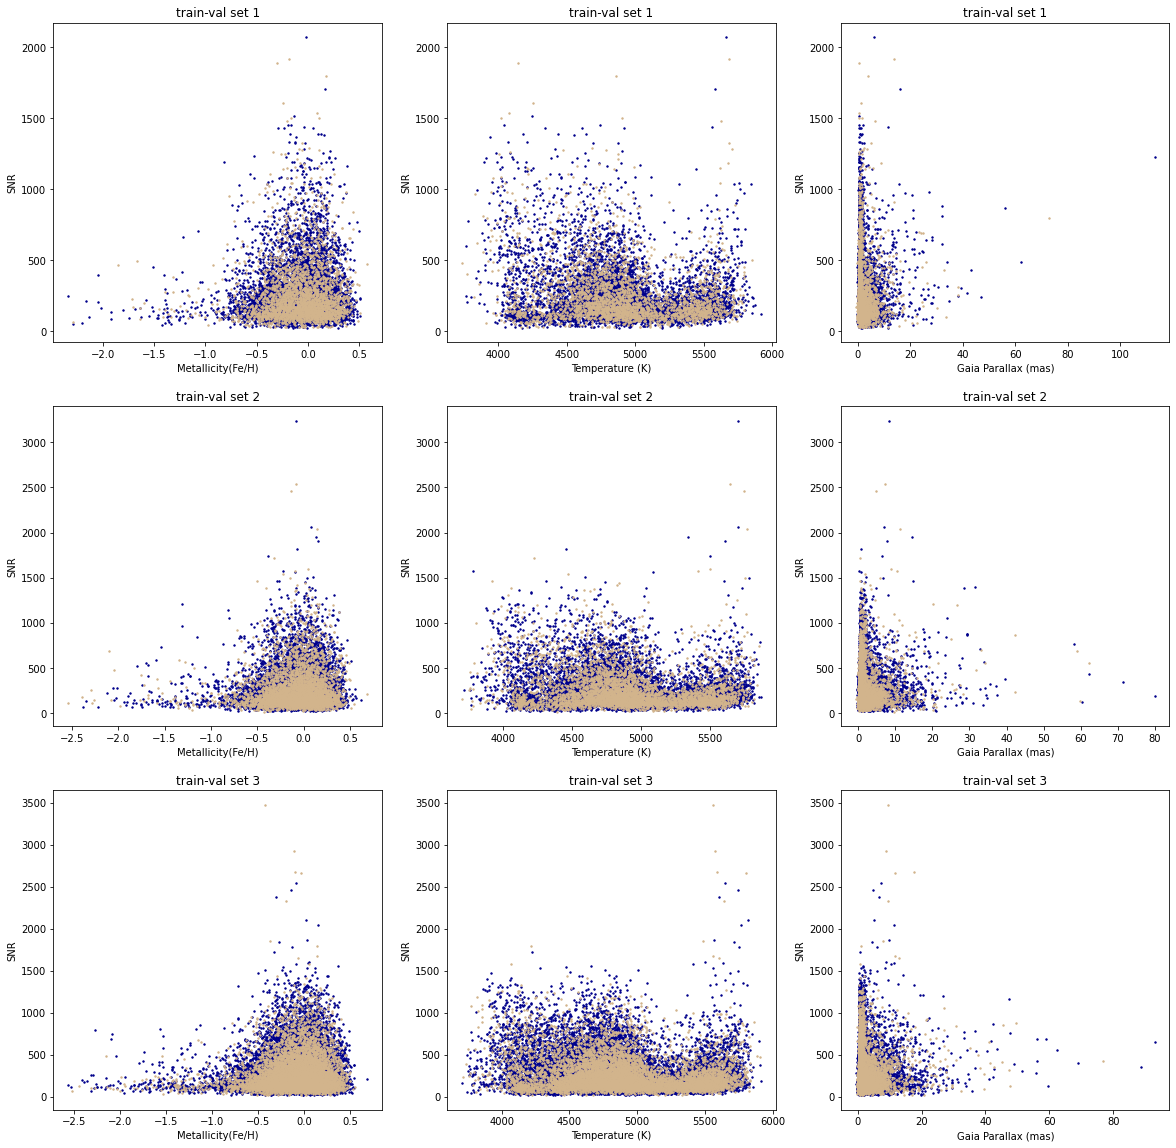

In [88]:
#Train-Val-1

plt.figure(figsize = (20,20))

plt.subplot(3,3,1)
plt.scatter(FeH_train1[idx_train1], snr_train1[idx_train1],color = "darkblue",s = 2)
plt.scatter(FeH_val1[idx_val1],snr_val1[idx_val1],color="tan",s=2)
plt.xlabel("Metallicity(Fe/H)")
plt.ylabel("SNR")
plt.title("train-val set 1")

plt.subplot(3,3,2)
plt.scatter(teff_train1[idx_train1], snr_train1[idx_train1],color = "darkblue",s = 2)
plt.scatter(teff_val1[idx_val1],snr_val1[idx_val1],color="tan",s=2)
plt.xlabel("Temperature (K)")
plt.ylabel("SNR")
plt.title("train-val set 1")

plt.subplot(3,3,3)
plt.scatter(Y_train1[idx_train1], snr_train1[idx_train1],color = "darkblue",s = 2)
plt.scatter(Y_val1[idx_val1],snr_val1[idx_val1],color="tan",s=2)
plt.xlabel("Gaia Parallax (mas)")
plt.ylabel("SNR")
plt.title("train-val set 1")

#Train-Val-2

plt.subplot(3,3,4)
plt.scatter(FeH_train2[idx_train2], snr_train2[idx_train2],color = "darkblue",s = 2)
plt.scatter(FeH_val2[idx_val2],snr_val2[idx_val2],color="tan",s=2)
plt.xlabel("Metallicity(Fe/H)")
plt.ylabel("SNR")
plt.title("train-val set 2")

plt.subplot(3,3,5)
plt.scatter(teff_train2[idx_train2], snr_train2[idx_train2],color = "darkblue",s = 2)
plt.scatter(teff_val2[idx_val2],snr_val2[idx_val2],color="tan",s=2)
plt.xlabel("Temperature (K)")
plt.ylabel("SNR")
plt.title("train-val set 2")

plt.subplot(3,3,6)
plt.scatter(Y_train2[idx_train2], snr_train2[idx_train2],color = "darkblue",s = 2)
plt.scatter(Y_val2[idx_val2],snr_val2[idx_val2],color="tan",s=2)
plt.xlabel("Gaia Parallax (mas)")
plt.ylabel("SNR")
plt.title("train-val set 2")


#Train-Val-3

plt.subplot(3,3,7)
plt.scatter(FeH_train3[idx_train3], snr_train3[idx_train3],color = "darkblue",s = 2)
plt.scatter(FeH_val3[idx_val3],snr_val3[idx_val3],color="tan",s=2)
plt.xlabel("Metallicity(Fe/H)")
plt.ylabel("SNR")
plt.title("train-val set 3")

plt.subplot(3,3,8)
plt.scatter(teff_train3[idx_train3], snr_train3[idx_train3],color = "darkblue",s = 2)
plt.scatter(teff_val3[idx_val3],snr_val3[idx_val3],color="tan",s=2)
plt.xlabel("Temperature (K)")
plt.ylabel("SNR")
plt.title("train-val set 3")

plt.subplot(3,3,9)
plt.scatter(Y_train3[idx_train3], snr_train3[idx_train3],color = "darkblue",s = 2)
plt.scatter(Y_val3[idx_val3],snr_val3[idx_val3],color="tan",s=2)
plt.xlabel("Gaia Parallax (mas)")
plt.ylabel("SNR")
plt.title("train-val set 3")

#Test

#plt.subplot(4,4,1)
#plt.scatter(Y_test[idx_test], snr_test[idx_test],color = "darkblue",s = 2)
#plt.scatter(Y_test[idx_test],snr_test[idx_test],color="tan",s=2)
#plt.xlabel("Gaia Parallax (mas)")
#plt.ylabel("SNR")
#plt.title("training set 1")

plt.show()

Cargamos el modelo y los datos

In [90]:
model = load_model('/home/anell/Desktop/TesisAnell/Models_NN/CD2_ADAM_MSE.h5')

In [91]:
preds_train1 = model.predict([X_train1,K_mag_train1,X_offset_train1])
preds_val1 = model.predict([X_val1,K_mag_val1,X_offset_val1])

In [92]:
preds_train1

array([[1.0600559],
       [1.1537199],
       [1.2432516],
       ...,
       [1.2489858],
       [1.0408347],
       [1.0598446]], dtype=float32)

In [93]:
Y_train1

array([[0.30627924],
       [3.45902371],
       [1.41844658],
       ...,
       [0.24669345],
       [1.22258033],
       [4.84702865]])